## **Install and Load Dataset**

In [2]:
# Install required libraries (most are pre-installed in Colab)
!pip install seaborn plotly

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline

# Load dataset (adjust file name if needed)
df = pd.read_csv('/city_day.csv')
print("Shape:", df.shape)
df.head()


Shape: (29531, 16)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


## **Cleanup and Prepare**

In [3]:
# Check for missing values
df.info()
df.isnull().sum()

# Drop rows without Date or City or PM2.5
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')
df = df.dropna(subset=['Date', 'City', 'PM2.5'])

# Keep top 8 cities by record count
top_cities = df['City'].value_counts().nlargest(8).index
df_top = df[df['City'].isin(top_cities)].copy()

# Create month column
df_top['Month'] = df_top['Date'].dt.to_period('M').dt.to_timestamp()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


## **Visualization 1 : Monthly Trends**

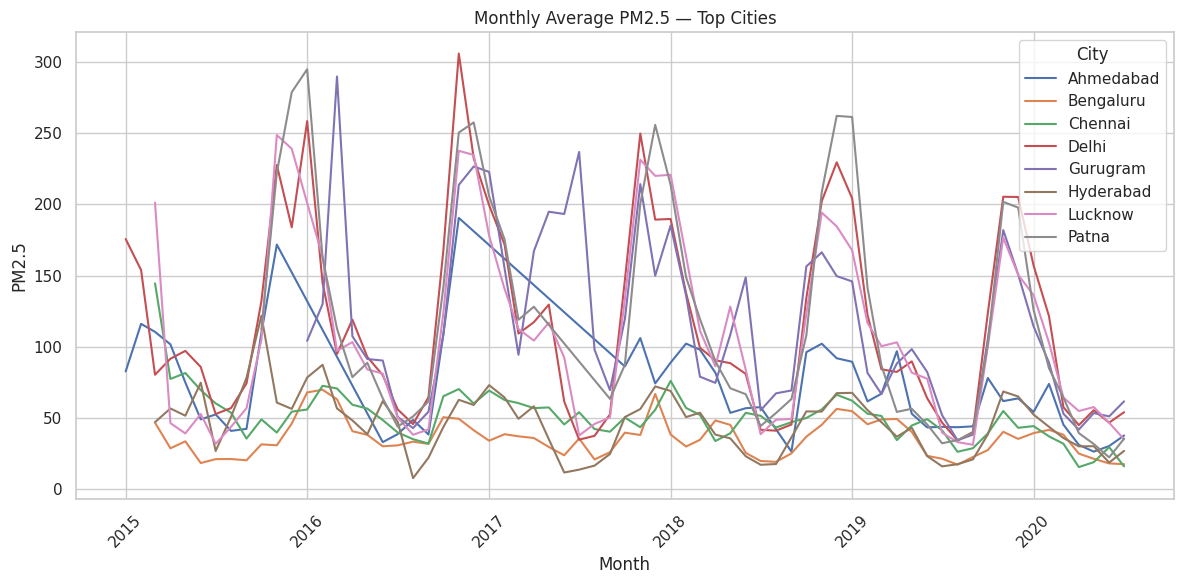

<Figure size 640x480 with 0 Axes>

In [31]:
monthly_avg = df_top.groupby(['City', 'Month'])['PM2.5'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_avg, x='Month', y='PM2.5', hue='City')
plt.title('Monthly Average PM2.5 — Top Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/content/monthly_trend.png', bbox_inches='tight')


## **Visualization 2 : HeatMap**

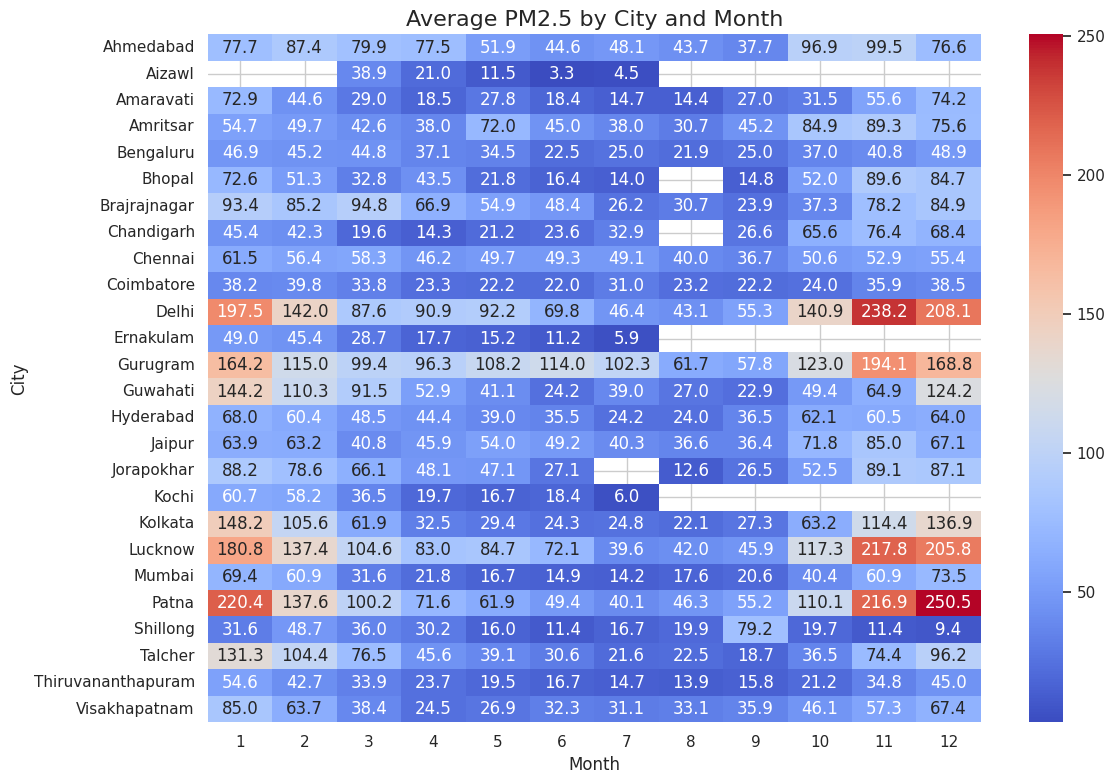

<Figure size 640x480 with 0 Axes>

In [30]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract month number
df['month'] = df['date'].dt.month

# Group by city and month, then get mean PM2.5
monthly_avg = df.groupby(['city', 'month'], as_index=False)['pm2.5'].mean()

# Create pivot table for heatmap
heat_data = monthly_avg.pivot(index='city', columns='month', values='pm2.5')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heat_data, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Average PM2.5 by City and Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('City')
plt.tight_layout()
plt.show()
plt.savefig('/content/monthly_trend.png', bbox_inches='tight')


## **Visualization 3 : Boxplot**

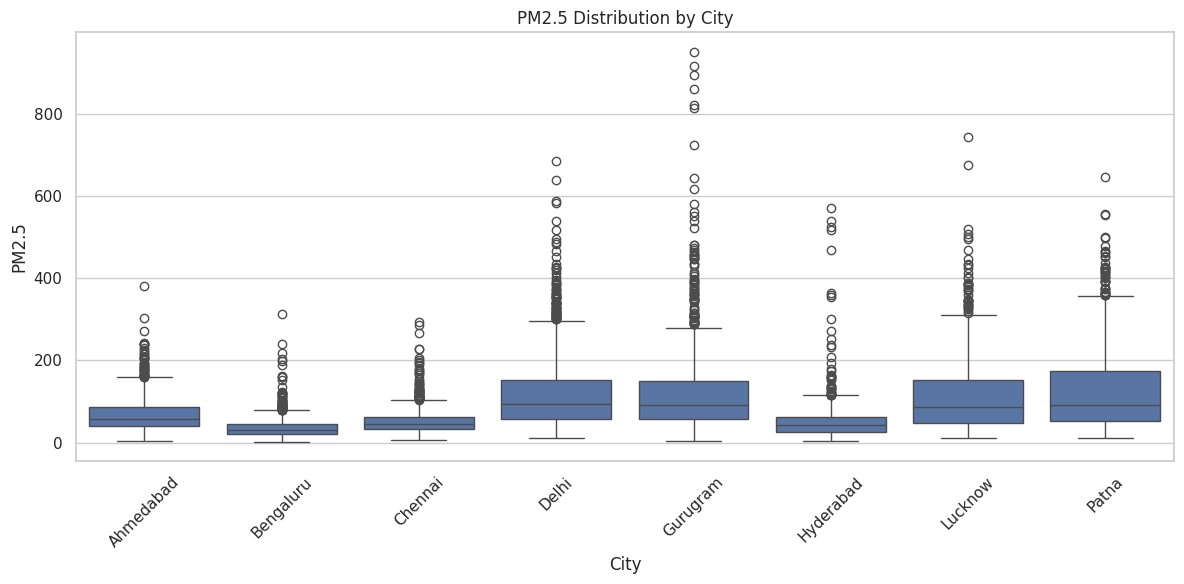

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top, x='City', y='PM2.5')
plt.title('PM2.5 Distribution by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/content/monthly_trend.png', bbox_inches='tight')
